In [61]:
from scipy.optimize  import curve_fit
from scipy.integrate import ode

import numpy as np
import matplotlib.pyplot as plt

In [62]:
def simulate(dsystem, InitialValues, t0 = 0, n_period = 1, delta_t = 1.0E-4):
    r = ode(dsystem)
    r.set_initial_value(InitialValues, t0)
    Values = [InitialValues]
    T = [t0]
    velocities_prod = np.prod(InitialValues[2:4])
    quarter_max   = n_period * 4
    quarter_count = 0
    while r.successful() and quarter_count <= quarter_max:
        t = r.t + delta_t
        values = r.integrate(t)
        Values.append(values)
        T.append(t)
        if np.prod(values[2:4])*velocities_prod <= 0:
            quarter_count += 1
        velocities_prod = np.prod(values[2:4])
    Values = np.array(Values)
    T      = np.array(T)
    return np.concatenate((Values, T[np.newaxis].T), axis=1)

In [63]:
# Constantes (em UA)
GMs   = 4*np.pi**2
#a    = 0.39
e     = 0.206

A = np.linspace(0.3, 0.6, 20)

In [64]:
def dmercury_orbit(t, InitialValues):
    x, y, vx, vy = InitialValues
    r = np.sqrt(x**2 + y**2)
    return [vx, vy, -GMs/r**3*x, -GMs/r**3*y]

0.2436


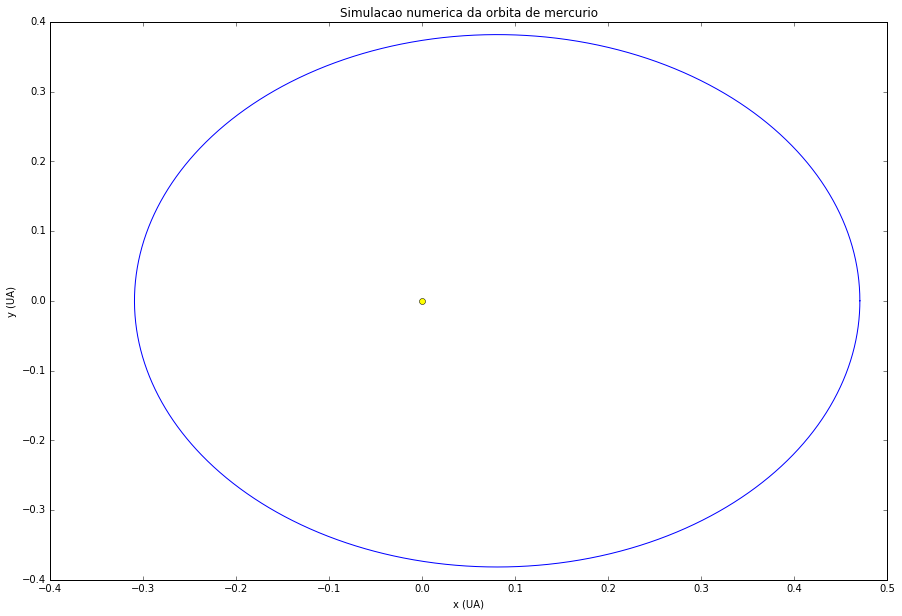

In [65]:
def process(a):
    R0 = (1 + e)*a, 0
    V0 = 0, np.sqrt(GMs*(1 - e)/(a*(1 + e)))
    Values0 = list((*R0, *V0))
    return simulate(dmercury_orbit, Values0)

a = 0.39
Values = process(a)

fig = plt.figure(figsize=(15,10))
plt.title(r"Simulacao numerica da orbita de mercurio")
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.plot(0, 0, 'o', color='yellow')
plt.plot(Values[:,0], Values[:,1])
print(Values[-1,-1])
plt.show()

In [66]:
T = []
for a_i in A:
    Values_i = process(a_i)
    T.append(Values_i[-1,-1])
T = np.array(T)

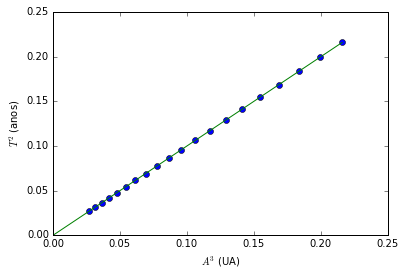

In [67]:
X, Y = A**3, T**2
slope, cov = curve_fit(lambda x, c: c*x, X, Y)
X_lin = np.linspace(0, np.max(X))

plt.plot(X, Y, 'o')
plt.plot(X_lin, slope[0]*X_lin)
plt.xlabel(r'$A^3$ (UA)')
plt.ylabel(r'$T^2$ (anos)')
plt.show()

In [68]:
print(slope[0])

1.00031478059


3.141592653589793